In [ ]:
import cv2
import os

from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
# unzipping the training set
!unzip "/content/drive/MyDrive/Datasets/Rock Paper Scissors/training.zip" -d "/content/drive/MyDrive/Datasets/Rock Paper Scissors/"

In [ ]:
# unzipping the testing set
!unzip "/content/drive/MyDrive/Datasets/Rock Paper Scissors/testing.zip" -d "/content/drive/MyDrive/Datasets/Rock Paper Scissors/"

# Data Augmentation

In [ ]:
train_datagen = ImageDataGenerator( rescale=1./255,
                                    zoom_range=0.15,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.15,
                                    horizontal_flip=True,
                                    validation_split=0.2 )

test_datagen = ImageDataGenerator( rescale=1./255 )

In [ ]:
train = train_datagen.flow_from_directory(
    directory="/content/drive/MyDrive/Datasets/Rock Paper Scissors/Training",
    target_size=(300, 300),
    batch_size=128,
    subset="training"
)

Found 2016 images belonging to 3 classes.


In [ ]:
train.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [ ]:
validation = train_datagen.flow_from_directory(
    directory="/content/drive/MyDrive/Datasets/Rock Paper Scissors/Training",
    target_size=(300, 300),
    batch_size=128,
    subset="validation"
)

Found 504 images belonging to 3 classes.


In [ ]:
test = test_datagen.flow_from_directory(
    directory="/content/drive/MyDrive/Datasets/Rock Paper Scissors/Testing",
    target_size=(300, 300),
    batch_size=128
)

Found 372 images belonging to 3 classes.


# CCN Architecture

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), activation="relu", input_shape=(300,300,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dense(3, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

In [ ]:
model.compile(
    optimizer="RMSprop",
    loss="categorical_crossentropy",
    metrics=['acc']
)

In [ ]:
history = model.fit_generator(
    generator = train,
    epochs = 25,
    validation_data = validation
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
16/16 [==============================] - 54s 3s/step - loss: 1.7679 - acc: 0.4272 - val_loss: 0.9722 - val_acc: 0.4306
Epoch 2/25
16/16 [==============================] - 53s 3s/step - loss: 0.9457 - acc: 0.6044 - val_loss: 0.8747 - val_acc: 0.5635
Epoch 3/25
16/16 [==============================] - 53s 3s/step - loss: 0.7248 - acc: 0.7107 - val_loss: 0.7048 - val_acc: 0.6151
Epoch 4/25
16/16 [==============================] - 53s 3s/step - loss: 0.5863 - acc: 0.7584 - val_loss: 1.4860 - val_acc: 0.3750
Epoch 5/25
16/16 [==============================] - 52s 3s/step - loss: 0.6668 - acc: 0.7152 - val_loss: 0.8088 - val_acc: 0.6587
Epoch 6/25
16/16 [==============================] - 53s 3s/step - loss: 0.4886 - acc: 0.8158 - val_loss: 0.6377 - val_acc: 0.7262
Epoch 7/25
16/16 [==============================] - 53s 3s/step - loss: 0.3784 - acc: 0.8626 - val_loss: 0.9859 - val_acc: 0.5952
Epoch 8/25
16/16 [==============================] - 52s 3s/step - loss: 0.4438 - acc: 0.83

In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/rock_paper_scissors.h5")

# Evaluating the Losses & Accuracy

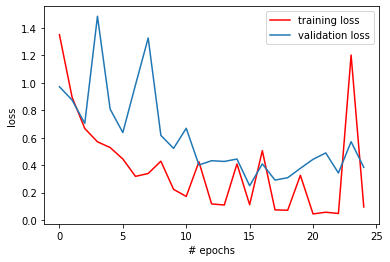

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

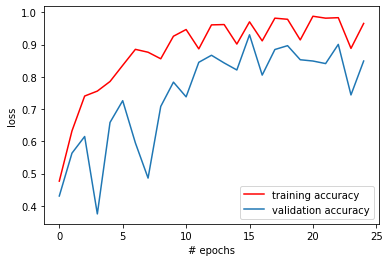

In [ ]:
plt.plot(history.history['acc'],'r',label='training accuracy')
plt.plot(history.history['val_acc'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Testing

In [ ]:
model.evaluate_generator(test)[1]*100

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


99.19354915618896

In [ ]:
def predict(img_path):

  prediction = []

  img = cv2.imread(test_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (300,300))
  img = img_to_array(img)
  img = img.reshape(1, 300, 300, 3)

  predicted_class = model.predict_classes(img)
  predicted_class_proba = round(max(model.predict(img)[0])*100, 2)

  # "'paper': 0, 'rock': 1, 'scissors': 2"

  if predicted_class[0] == 0:
    prediction.append('Paper')

  elif predicted_class[0] == 1:
    prediction.append('Rock')
  
  else:
    prediction.append('Scissors')

  prediction.append(predicted_class_proba)

  return(prediction)

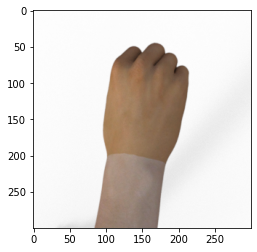

['Rock', 100.0]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
test_path = "/content/drive/MyDrive/Datasets/Rock Paper Scissors/Testing/rock/testrock04-04.png"

plt.imshow(cv2.cvtColor(cv2.imread(test_path), cv2.COLOR_BGR2RGB))
plt.show()

print(predict(test_path))

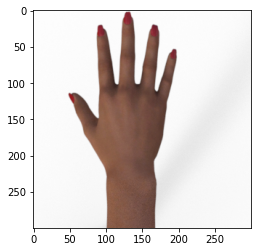

['Paper', 100.0]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
test_path = "/content/drive/MyDrive/Datasets/Rock Paper Scissors/Testing/paper/testpaper02-06.png"

plt.imshow(cv2.cvtColor(cv2.imread(test_path), cv2.COLOR_BGR2RGB))
plt.show()

print(predict(test_path))

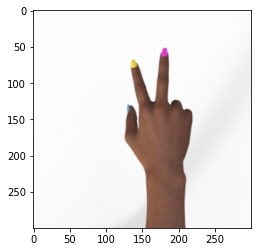

['Scissors', 100.0]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
test_path = "/content/drive/MyDrive/Datasets/Rock Paper Scissors/Testing/scissors/testscissors02-15.png"

plt.imshow(cv2.cvtColor(cv2.imread(test_path), cv2.COLOR_BGR2RGB))
plt.show()

print(predict(test_path))